# Nike Manufacturing Analysis
By Corey Kozlovski

The data I found was about Nike's independent factories and material suppliers that are used to manufacture all Nike products. Since, as a company, they believe in transparency, they publish data about their entire manufacturing process. This includes the factory names, factory type, product type, which division of Nike they are apart of (Nike, Converse, Hurley, etc), collegiate, address, operating region, workers, and contact information. This can all be accessed at: http://manufacturingmap.nikeinc.com/

Since the data came as an excel file instead of a CSV file, all the formatting through pandas came broken so a big portion of my cleaning was reformatting through re-labeling columns and removing the first row. Furthermore, I decided to remove a lot of columns as it had information I had no intention of using for my analysis. This included, but was not limited to, any form of contact information, collegiate status, and street address.


In [31]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [32]:
nike = pd.read_excel("export.xls")
nike.head()

,Nike Global Manufacturing Data Export - Filters applied: ((none)) Data As Of November 2018,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Factory Name,Factory Type,Product Type,"Nike, Inc. Brand(s)",Events,Supplier Group,Address,City,State,Postal Code,...,Operating Region,Total Workers,Line Workers,% Female Workers,% Migrant Workers,Contact Name,Contact Phone,Contact Fax,Contact Email,Subcons
1,"A & K DESIGNS, INC.",FINISHED GOODS,APPAREL,NIKE,NaN,A & K DESIGNS,8325 SE HARNEY ST.,PORTLAND,OREGON,97266,...,AMERICAS,104,90,64.0%,0.0%,Jenny Foster,971-634-1901,877-968-2889,jenny.foster@akdesignsinc.com,NaN
2,A. FIRST VINA CO. LTD.,FINISHED GOODS,APPAREL,"NIKE, CONVERSE, HURLEY",NaN,A. FIRST VINA CO. LTD.,TAM PHUOC INDUSTRIAL ZONE,BIEN HOA,DONG NAI,NaN,...,SE ASIA,1951,1313,88.0%,48.6%,NaN,NaN,NaN,NaN,NaN
3,"ACABADOS Y SERIGRAFIA, SA (ACSA)",FINISHED GOODS,APPAREL,HURLEY,NaN,NO SUPPLIER GROUP,KM.16.5 A SAN JUAN SACATEPEQUEZ,MIXCO,GUATEMALA,NaN,...,AMERICAS,140,130,31.0%,0.0%,NaN,NaN,NaN,NaN,NaN
4,ADORA FOOTWEAR LIMITED,FINISHED GOODS,FOOTWEAR,CONVERSE,NaN,HONG FU,TAM DIEP INDUSTRIAL ZONE,TAM DIEP TOWN,NINH BINH PROVINCE.,NaN,...,SE ASIA,7694,6727,90.0%,14.4%,NaN,NaN,NaN,NaN,NaN


In [33]:
#Filtering and cleaning the data
nike_cleaned = nike.drop(['Unnamed: 4', 'Unnamed: 6', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis = 1)
nike_cleaned.columns = ['Factory Name', 'Factory Type', 'Product Type', 'Nike, Inc Brand(s)', 'Supplier Group', 'City', 'State', 'Postal Code', 'Country/Region', 'Operating Region', 'Total Workers', 'Line Workers', '% Female Workers', '% Migrant Workers']
nike_cleaned = nike_cleaned.drop([0,0], axis=0)
nike_cleaned.head()

,Factory Name,Factory Type,Product Type,"Nike, Inc Brand(s)",Supplier Group,City,State,Postal Code,Country/Region,Operating Region,Total Workers,Line Workers,% Female Workers,% Migrant Workers
1,"A & K DESIGNS, INC.",FINISHED GOODS,APPAREL,NIKE,A & K DESIGNS,PORTLAND,OREGON,97266,USA,AMERICAS,104,90,64.0%,0.0%
2,A. FIRST VINA CO. LTD.,FINISHED GOODS,APPAREL,"NIKE, CONVERSE, HURLEY",A. FIRST VINA CO. LTD.,BIEN HOA,DONG NAI,NaN,VIETNAM,SE ASIA,1951,1313,88.0%,48.6%
3,"ACABADOS Y SERIGRAFIA, SA (ACSA)",FINISHED GOODS,APPAREL,HURLEY,NO SUPPLIER GROUP,MIXCO,GUATEMALA,NaN,GUATEMALA,AMERICAS,140,130,31.0%,0.0%
4,ADORA FOOTWEAR LIMITED,FINISHED GOODS,FOOTWEAR,CONVERSE,HONG FU,TAM DIEP TOWN,NINH BINH PROVINCE.,NaN,VIETNAM,SE ASIA,7694,6727,90.0%,14.4%
5,AIRTEX,FINISHED GOODS,EQUIPMENT,NIKE,"STX, LLC",MINNEAPOLIS,MINNESOTA,55413,USA,AMERICAS,72,42,69.0%,0.0%


Exploratory Data Analysis #1: 
Does Nike export most of it's manufacturing to other regions? If so, what regions are the most popular?


In [34]:
#Creating a bar graph for analysis
x_values = nike_cleaned['Operating Region'].unique()
x_values_cleaned = x_values[0:5]

y_values = nike_cleaned['Operating Region'].value_counts()
y_pos = [y_values['AMERICAS'], y_values['SE ASIA'], y_values['EMEA'],  y_values['N ASIA'],  y_values['S ASIA']]

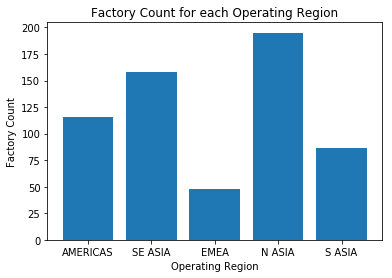

In [35]:
#Plotting the graph
plt.bar(x_values_cleaned, height=y_pos)
plt.xlabel("Operating Region")
plt.ylabel("Factory Count")
plt.title("Factory Count for each Operating Region")
plt.show()

This bar graph shows that the most popular Operating Regions in terms of number of factories is North Asia, Southeast Asia, and then the Americas. While this is useful, I think it would be interesting as well to see how many workers are in each Operating Region as well, to give a different perspective on the dataset. 

In [36]:
#Finding total number of workers in each region
americas_count = 0
se_asia_count = 0
emea_count = 0
n_asia_count = 0
s_asia_count = 0

for index,row in nike_cleaned.iterrows():
    if not math.isnan(row['Total Workers']):
        if row['Operating Region'] == "AMERICAS":
            americas_count += row['Total Workers']
        elif row['Operating Region'] == "SE ASIA":
            se_asia_count += row['Total Workers']
        elif row['Operating Region'] == "EMEA":
            emea_count += row['Total Workers']
        elif row['Operating Region'] == "N ASIA":
            n_asia_count += row['Total Workers']
        elif row['Operating Region'] == "S ASIA":
            s_asia_count += row['Total Workers']
  

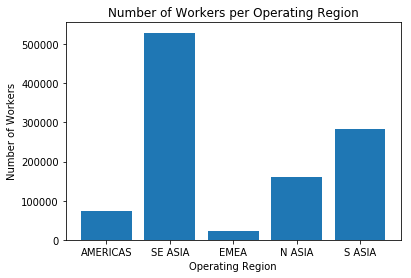

In [37]:
#Plotting the data
num_workers = [americas_count, se_asia_count, emea_count, n_asia_count, s_asia_count]

plt.bar(x_values_cleaned, height=num_workers)
plt.xlabel("Operating Region")
plt.ylabel("Number of Workers")
plt.title("Number of Workers per Operating Region")
plt.show()

As you can see, despite the Americas being the 3rd highest in terms of number of factories, when it comes to number of workers, it is one of the lowest. SE Asia is very obviously the leader in terms of number of workers despite having less factories than North Asia. From this data we learn that Nike does export the majority of its manufacturing, mostly to Asian regions, and that despite some regions having more factories, that does not correlate with how many workers are within each factory.

Exploratory Data Analysis #2: Does location affect what kind of good is produced (as in materials, finished goods, etc)? Why?


In [38]:
product_type = nike_cleaned['Factory Type'].unique()
table = pd.DataFrame([["AMERICAS", 0,0,0], ["SE ASIA",0,0,0], ["EMEA",0,0,0], ["N ASIA",0,0,0], ["S ASIA",0,0,0]], columns=['Operating Region', product_type[0], product_type[1], product_type[2]])

for index,row in nike_cleaned.iterrows():
    if row['Operating Region'] == "AMERICAS":
        if row['Factory Type'] == product_type[0]:
            table.iloc[0,1] += 1
        elif row['Factory Type'] == product_type[1]:
            table.iloc[0,2] += 1
        elif row['Factory Type'] == product_type[2]:
            table.iloc[0,3] += 1
    elif row['Operating Region'] == "SE ASIA":
        if row['Factory Type'] == product_type[0]:
            table.iloc[1,1] += 1
        elif row['Factory Type'] == product_type[1]:
            table.iloc[1,2] += 1
        elif row['Factory Type'] == product_type[2]:
            table.iloc[1,3] += 1
    elif row['Operating Region'] == "EMEA":
        if row['Factory Type'] == product_type[0]:
            table.iloc[2,1] += 1
        elif row['Factory Type'] == product_type[1]:
            table.iloc[2,2] += 1
        elif row['Factory Type'] == product_type[2]:
            table.iloc[2,3] += 1
    elif row['Operating Region'] == "N ASIA":
        if row['Factory Type'] == product_type[0]:
            table.iloc[3,1] += 1
        elif row['Factory Type'] == product_type[1]:
            table.iloc[3,2] += 1
        elif row['Factory Type'] == product_type[2]:
            table.iloc[3,3] += 1
    elif row['Operating Region'] == "S ASIA":
        if row['Factory Type'] == product_type[0]:
            table.iloc[4,1] += 1
        elif row['Factory Type'] == product_type[1]:
            table.iloc[4,2] += 1
        elif row['Factory Type'] == product_type[2]:
            table.iloc[4,3] += 1
  
print(table)

  Operating Region  FINISHED GOODS  MATERIALS  FINISHED GOODS - COMPONENTS
0         AMERICAS             105          3                            8
1          SE ASIA             130         21                            7
2             EMEA              46          1                            1
3           N ASIA             123         45                           27
4           S ASIA              75          7                            4


In [39]:
table['% of Finished Goods'] = table['FINISHED GOODS'] / (table['FINISHED GOODS'] + table['MATERIALS'] + table['FINISHED GOODS - COMPONENTS'])
print(table)

  Operating Region  FINISHED GOODS  MATERIALS  FINISHED GOODS - COMPONENTS  \
0         AMERICAS             105          3                            8   
1          SE ASIA             130         21                            7   
2             EMEA              46          1                            1   
3           N ASIA             123         45                           27   
4           S ASIA              75          7                            4   

   % of Finished Goods  
0             0.905172  
1             0.822785  
2             0.958333  
3             0.630769  
4             0.872093  


From the % of Finished Goods column, we can see that both Americas and Europe/Middle East/Africa have the highest percent of their goods produced as finished goods. I think this speaks to how the Asian regions (more specifically North Asia and Southeast Asia, as South Asia leaned more towards Finished Goods) are producing a higher percent of materials and components, which then get shipped out to other regions to manufacture into products. This method is likely because manufacturing costs for materials would likely be cheaper in these Asia regions, so being able to make the parts, ship it to other regions, and have those regions complete it, is likely cheaper than having Asian regions complete the product and ship it out as a whole product. 